# Chapter 2 - Essential Statistics for Data Assessment

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

### Classification of variable types: numerical and categorical

In [4]:
df = pd.read_excel("PopulationEstimates.xls",skiprows=2)
df.head(8)

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4779736,4780138,...,0.424031,1.171362,0.516888,1.234191,1.607294,0.619874,0.646064,0.817666,1.079070,1.856398
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,54571,54574,...,1.066088,0.666403,6.002073,-6.119262,-3.885124,1.971001,-1.859380,5.250727,1.029950,0.630381
3,1003,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,182265,182264,...,21.996950,24.298662,16.345147,17.638173,22.876199,20.239802,17.932091,21.484903,22.534622,24.846682
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,27457,27457,...,-25.501697,-9.072923,0.256035,-6.786002,-8.093425,-5.102231,-15.531931,-18.152860,-25.030896,-8.593297
5,1007,AL,Bibb County,1.0,1.0,1.0,1.0,0.0,22915,22920,...,-3.589550,-7.029251,-5.041759,-3.787629,-5.666224,1.065317,1.507660,-0.753246,-3.146396,-6.584362
6,1009,AL,Blount County,1.0,1.0,1.0,1.0,0.0,57322,57321,...,6.224858,-0.172910,0.243633,-1.633022,-0.295188,-1.980336,-1.286475,-1.025739,6.363573,-0.034582
7,1011,AL,Bullock County,6.0,6.0,6.0,6.0,3.0,10914,10911,...,-20.820159,-2.953628,-22.546973,-7.047547,-6.427829,9.521116,-24.590553,-3.079736,-21.014740,-3.150537


In [5]:
df.columns

Index(['FIPS', 'State', 'Area_Name', 'Rural-urban_Continuum Code_2003',
       'Rural-urban_Continuum Code_2013', 'Urban_Influence_Code_2003',
       'Urban_Influence_Code_2013', 'Economic_typology_2015',
       'CENSUS_2010_POP', 'ESTIMATES_BASE_2010',
       ...
       'R_DOMESTIC_MIG_2017', 'R_DOMESTIC_MIG_2018', 'R_NET_MIG_2011',
       'R_NET_MIG_2012', 'R_NET_MIG_2013', 'R_NET_MIG_2014', 'R_NET_MIG_2015',
       'R_NET_MIG_2016', 'R_NET_MIG_2017', 'R_NET_MIG_2018'],
      dtype='object', length=149)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3273 entries, 0 to 3272
Columns: 149 entries, FIPS to R_NET_MIG_2018
dtypes: float64(135), int64(12), object(2)
memory usage: 3.7+ MB


Many datasets use integers to represent categorical variables. Treating them as numerical
values may result in serious consequences in terms of downstream tasks such as machine
learning, mainly because artificial distances between numerical values will be introduced.

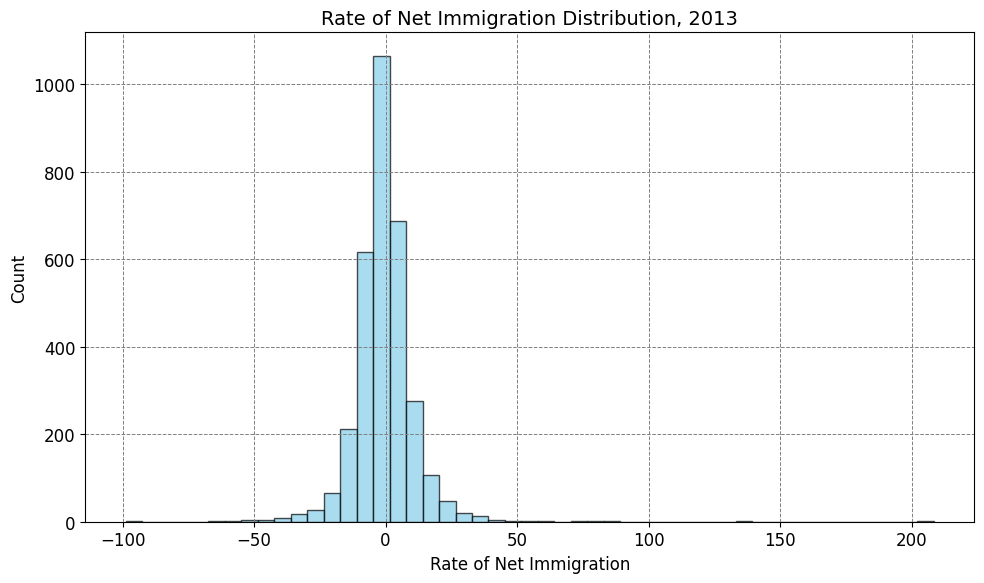

In [8]:
plt.figure(figsize=(10, 6))             # Set figure size to make the plot larger and easier to read
plt.rcParams.update({'font.size': 12})  # Update font size for better readability of labels, title, and ticks

# Plot a histogram for the column "R_NET_MIG_2013" of the DataFrame 'df'
plt.hist(df["R_NET_MIG_2013"], 
         bins=np.linspace(np.nanmin(df["R_NET_MIG_2013"]),  # Find the minimum non-NaN value in the column for binning
                          np.nanmax(df["R_NET_MIG_2013"]),  # Find the maximum non-NaN value in the column for binning
                          num=50),                          # Specify the number of bins to be 50
         color='skyblue',                                   # Set the color of the bars to sky blue
         edgecolor='black',                                 # Set the color of the edges of the bars to black for better visibility
         alpha=0.7)                                         # Set the transparency of the bars to 70% to make them slightly see-through

plt.title("Rate of Net Immigration Distribution, 2013", fontsize=14) # Set the title of the histogram
plt.xlabel("Rate of Net Immigration")                                # Label for x-axis
plt.ylabel("Count")                                                  # Label for y-axis

plt.grid(visible=True, linestyle='--', linewidth=0.7, color='grey')  # Add grid lines to improve readability of the plot
plt.tight_layout()                                                   # Adjust the layout to prevent overlap of elements
plt.show()                                                           # Display the histogram

`nanmin` is a function from the NumPy library (numpy) that returns the minimum value in an array, ignoring any NaN (Not a Number) values.

## Numerical variable: Mean, Median and Mode

### Mean

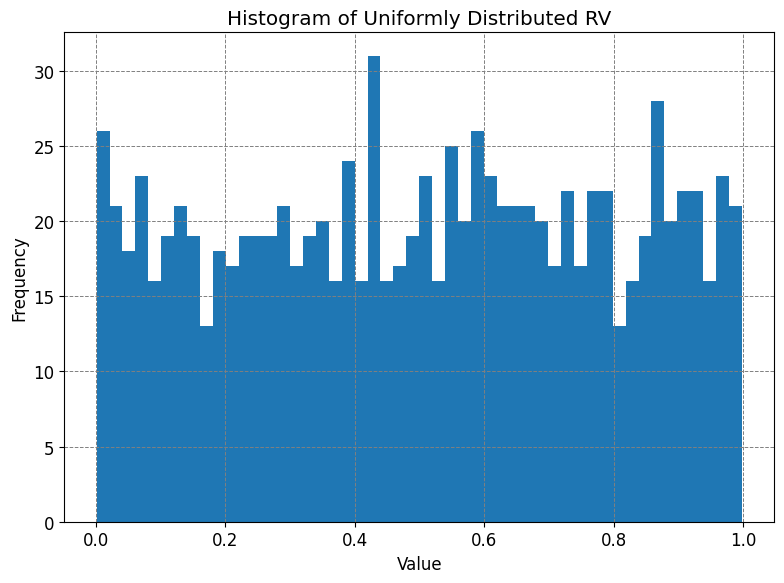

In [12]:
import random

random.seed(2019)           # Set a fixed random seed for reproducibility of random values

plt.figure(figsize=(8, 6))  # Set figure size to 8x6 inches for better readability

# Generate 1000 random values uniformly distributed between 0 and 1
rvs = [random.random() for _ in range(1000)]

plt.hist(rvs, bins=50)                              # Plot a histogram of the generated random values with 50 bins
plt.title("Histogram of Uniformly Distributed RV")  # Set the title for the histogram
plt.xlabel("Value")                                 # Label for x-axis 
plt.ylabel("Frequency")                             # Label for y-axis 

plt.grid(visible=True, linestyle='--', linewidth=0.7, color='grey')  # Add grid lines for better visualization
plt.tight_layout()                                                   # Adjust the layout
plt.show()                                                           # Display the histogram

In [13]:
# Calculate the mean of the list
np.mean(rvs)

0.5054772636416909

In [14]:
# Another way
import statistics

# Calculate the mean of the list
mean_value = statistics.mean(rvs)  
mean_value

0.5054772636416909

### Median

In [16]:
np.median(rvs)

0.5136755026003803

Now, I will be changing one entry to 1,000, which is 1,000 times larger than the maximal possible value in the dataset and repeat the calculation:

In [18]:
rvs[-1] = 1000
print(f'Mean: {np.mean(rvs)}\nMedian: {np.median(rvs)}')

Mean: 1.5054701085937803
Median: 0.5150437661964872


The mean increased by roughly 1, but the median is robust.

### Mode

The mode of a set of values is the most frequent element in a set. It is evident in a
histogram plot such that it represents the peak(s).

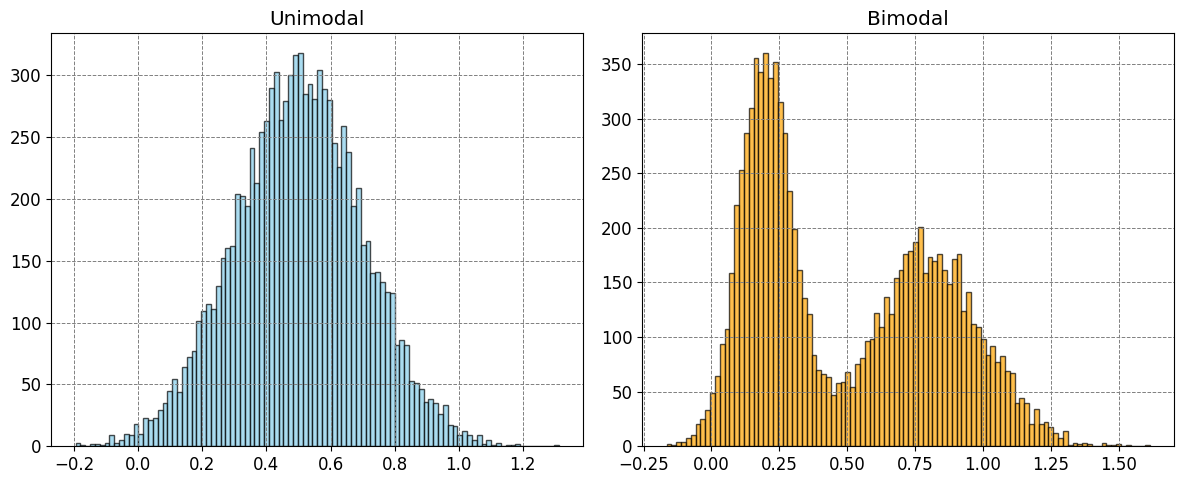

In [22]:
r1 = [random.normalvariate(0.5, 0.2) for _ in range(10000)]  # Generate 10,000 random values from a normal distribution with mean 0.5 and std dev 0.2
r2 = [random.normalvariate(0.2, 0.1) for _ in range(5000)]   # Generate 5,000 random values from a normal distribution with mean 0.2 and std dev 0.1
r3 = [random.normalvariate(0.8, 0.2) for _ in range(5000)]   # Generate 5,000 random values from a normal distribution with mean 0.8 and std dev 0.2

fig, axes = plt.subplots(1, 2, figsize=(12, 5))  # Create a figure with 1 row and 2 columns of subplots

# Plot histogram for 'r1' on the first subplot
axes[0].hist(r1, bins=100, color='skyblue', edgecolor='black', alpha=0.7)  # Histogram with 100 bins, styled with blue color
axes[0].set_title("Unimodal")                                              # Set the title of the first subplot
axes[0].grid(visible=True, linestyle='--', linewidth=0.7, color='grey')    # Add a grid to the first subplot

# Plot histogram for the combined 'r2' and 'r3' on the second subplot
axes[1].hist(r2 + r3, bins=100, color='orange', edgecolor='black', alpha=0.7)  # Histogram with 100 bins, styled with coral color
axes[1].set_title("Bimodal")                                                   # Set the title of the second subplot
axes[1].grid(visible=True, linestyle='--', linewidth=0.7, color='grey')        # Add a grid to the second subplot

plt.tight_layout()  # Adjust the layout
plt.show()          # Display the histograms